In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Task 1

**Item 1**

Python generator of Bernoulli random variable. Able to generate infinitely. 


In [331]:
def bern_gen(p):
    while True:
        if np.random.random() < p:
            yield 1
        else:
            yield 0

Python generator of binominal random variable. Able to generate infinitely.

In [332]:
def bin_gen(p, n):
    bg = bern_gen(p)
    while True:
        sum = 0
        for i in range(n):
            sum += next(bg)
        yield sum

Visualization of binominal distribution with success probability *p* and number of attempts *n*.

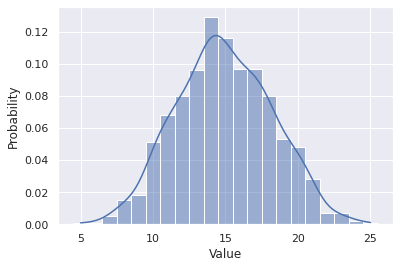

In [333]:
p = 0.3
n = 50
bing = bin_gen(p,n)
N = 1000

sns.set_theme()
values = {"Value" : [next(bing) for i in range(N)]}
sns.histplot(data = pd.DataFrame(values), x = "Value", kde = True, kde_kws = {"bw_adjust" : 1}, discrete = True, stat = 'probability')
del p, n, bing, N, values

**Item 2**

Python generator of geometric random variable. Able to generate infinitely.

In [334]:
def geom_gen(p):
    bg = bern_gen(p)
    while True:
        sum = 0
        while not next(bg):
            sum += 1
        yield sum

Visualization of geometric distribution.

<AxesSubplot:xlabel='n', ylabel='Probability'>

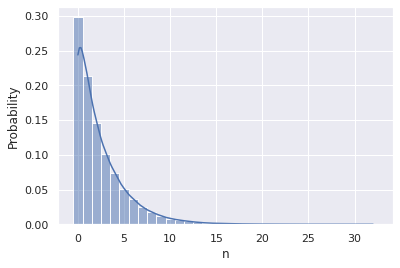

In [335]:
n = 100000
p = 0.3
gg = geom_gen(p)

sns.set_theme()
values = {"n" : [next(gg) for i in range(n)]}
sns.histplot(data = pd.DataFrame(values), x = "n", kde = True, kde_kws = {"bw_adjust" : 2}, discrete = True, stat = 'probability')

Representation of geometric distribution memoryless property:  $\mathbb{P}(\mathbb{X} > m + n \, | \, \mathbb{X} \geq m) = \mathbb{P}(\mathbb{X} > n) $.  
(Previous cell execution required)

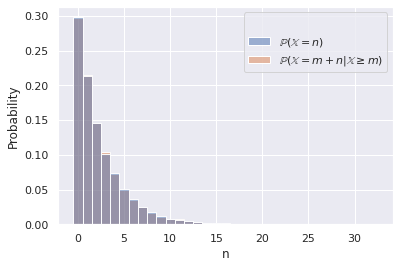

In [336]:
m = 5

values[" "] = r'$\mathbb{P}(\mathbb{X} = n)$'

cutted_values = {"n" : [value - m for value in values["n"] if value >= m]}
cutted_values[" "] = r"$\mathbb{P}(\mathbb{X} = m + n | \mathbb{X} \geq m)$"

df_new_values = pd.concat([pd.DataFrame(values), pd.DataFrame(cutted_values)], ignore_index = True)

sns.set_theme()
sns.histplot(data = df_new_values, x = "n", hue = " ", discrete = True, stat = "probability", common_norm = False)
del n, p, gg, values, cutted_values, df_new_values

**Item 3**

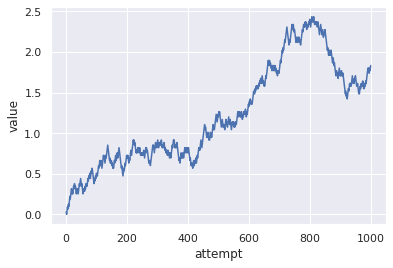

In [337]:
rng = np.random.default_rng()

n = 1000
df = pd.DataFrame(dict(attempt = np.arange(1, n + 1), value = rng.choice(np.array([-1, 1]), n).cumsum() / math.sqrt(n)))
sns.lineplot(x = "attempt", y = "value", data = df)
del rng, n, df